In [33]:
import pickle
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
import math
from scipy.stats import f
#%pip install numpy_indexed
import datetime
from sklearn.model_selection import train_test_split
from scipy.stats import gaussian_kde

In [34]:
df = pd.read_csv("../CleansedDataSets/DecemberCleansed.csv")
df['timestamp']= pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')
df = df.sort_index()
df = df.loc[df["Phi"]<0.2]
df.head()
df.count()

MDM current (A)                 40192
Actual Volume Flow (Nm3/sec)    40192
VDV Pos [%] (%)                 40192
IGV Pos [%] (%)                 40192
Isentropic His (J/kg)           40192
Phi                             40192
dtype: int64

In [35]:
df2 = pd.read_csv("../CleansedDataSets/JuneCleansed.csv")
df2['timestamp']= pd.to_datetime(df2['timestamp'])
df2 = df2.set_index('timestamp')
df2 = df2.sort_index()
df2 = df2.loc[df2["Phi"]<0.2]
df2.head()
df2.count()

MDM current (A)          160081
VDV Pos [%] (%)          160081
IGV Pos [%] (%)          160081
Isentropic His (J/kg)    160081
Phi                      160081
dtype: int64

In [36]:
df3 = pd.read_csv("../CleansedDataSets/cleansedTrainWOutlier.csv")
df3['timestamp']= pd.to_datetime(df3['timestamp'])
df3 = df3.set_index('timestamp')
df3 = df3.sort_index()
df3 = df3.loc[df3["Phi"]<0.2]
df3.head()
df3.count()

MDM current (A)                 94158
Actual Volume Flow (Nm3/sec)    94158
VDV Pos [%] (%)                 94158
IGV Pos [%] (%)                 94158
Isentropic His (J/kg)           94158
Phi                             94158
dtype: int64

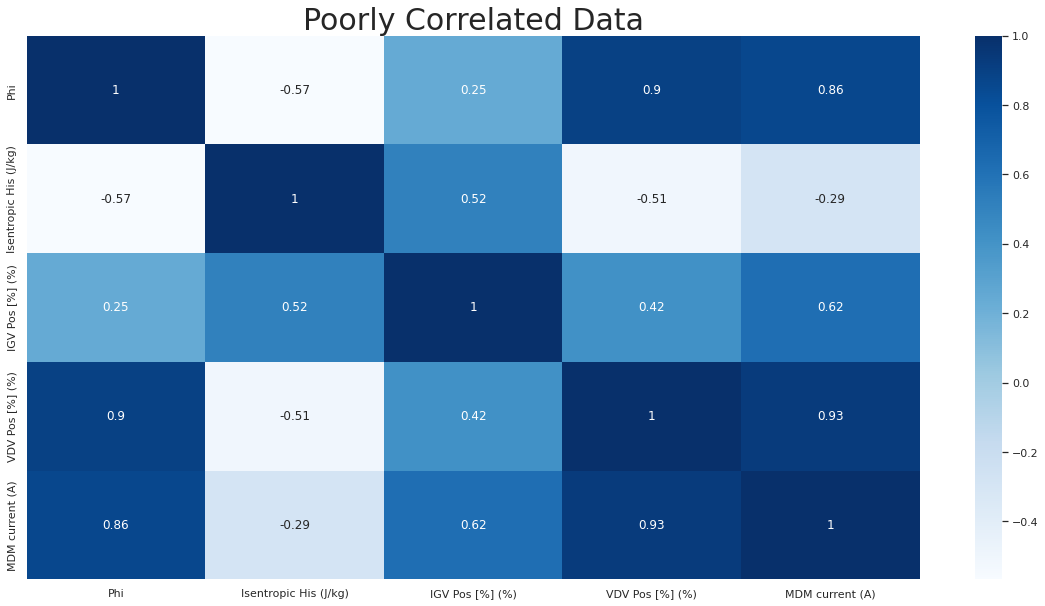

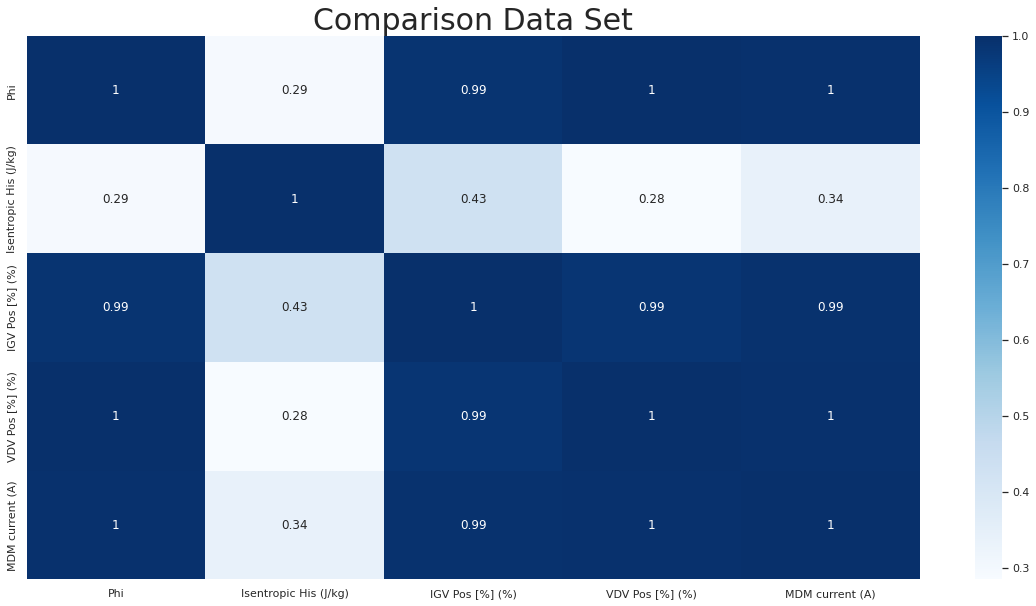

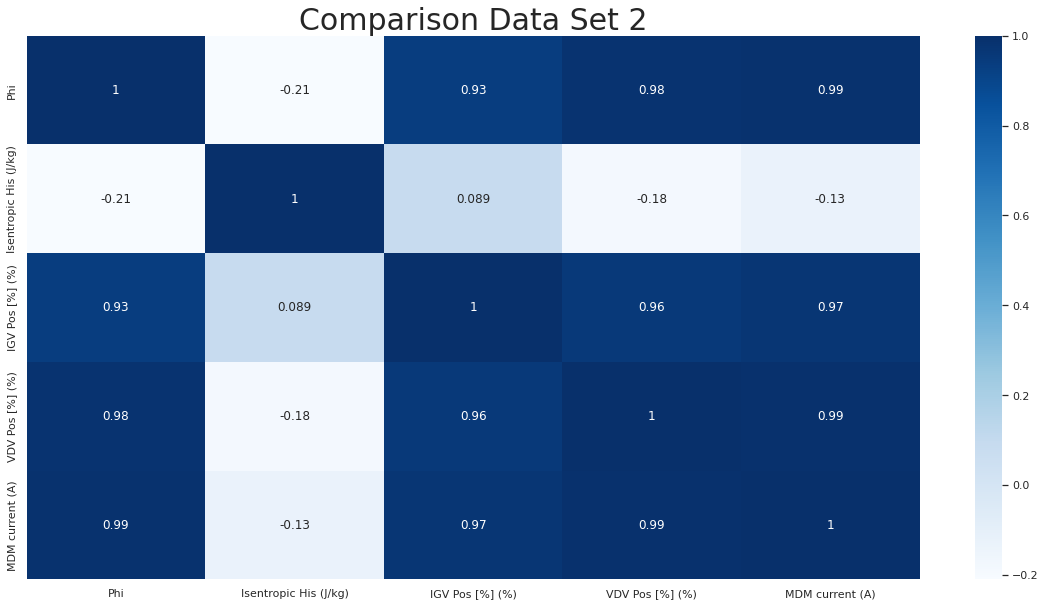

In [38]:
plt.title("Poorly Correlated Data", fontsize=30)
sns.heatmap(df[["Phi", "Isentropic His (J/kg)", "IGV Pos [%] (%)", "VDV Pos [%] (%)", "MDM current (A)"]].corr(), annot=True, cmap="Blues")
plt.show()
plt.title("Comparison Data Set", fontsize=30)
sns.heatmap(df2[["Phi", "Isentropic His (J/kg)", "IGV Pos [%] (%)", "VDV Pos [%] (%)", "MDM current (A)"]].corr(), annot=True, cmap="Blues")
plt.show()
plt.title("Comparison Data Set 2", fontsize=30)
sns.heatmap(df3[["Phi", "Isentropic His (J/kg)", "IGV Pos [%] (%)", "VDV Pos [%] (%)", "MDM current (A)"]].corr(), annot=True, cmap="Blues")
plt.show()

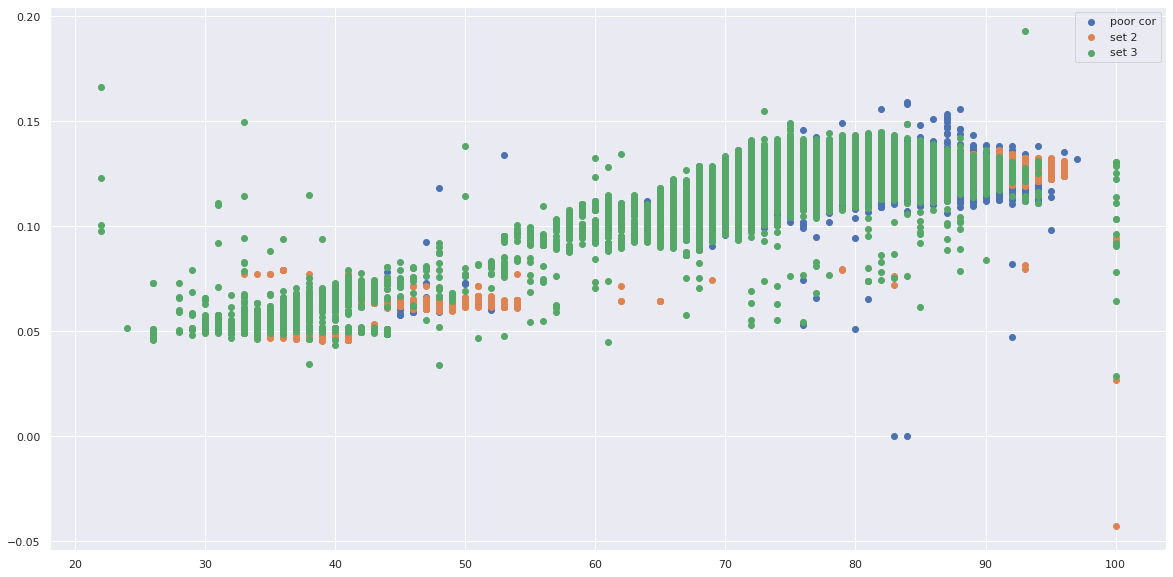

In [6]:
plt.scatter(x=df["IGV Pos [%] (%)"], y=df["Phi"], label="poor cor")
plt.scatter(x=df2["IGV Pos [%] (%)"], y=df2["Phi"], label="set 2")
plt.scatter(x=df3["IGV Pos [%] (%)"], y=df3["Phi"], label="set 3")
plt.legend()

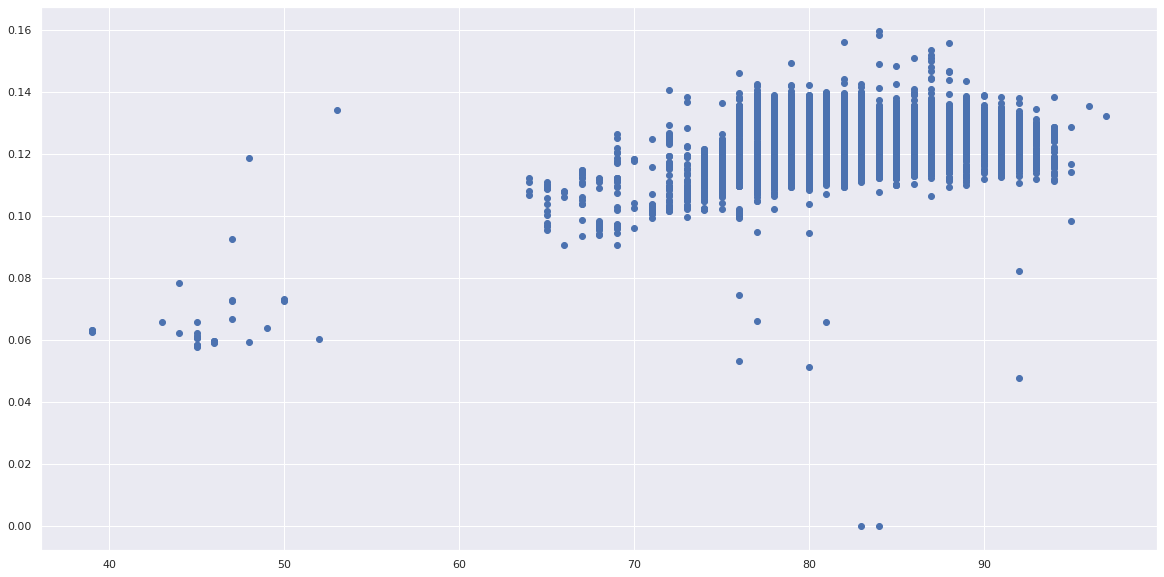

In [7]:
plt.scatter(x=df["IGV Pos [%] (%)"], y=df["Phi"], label="poor cor")

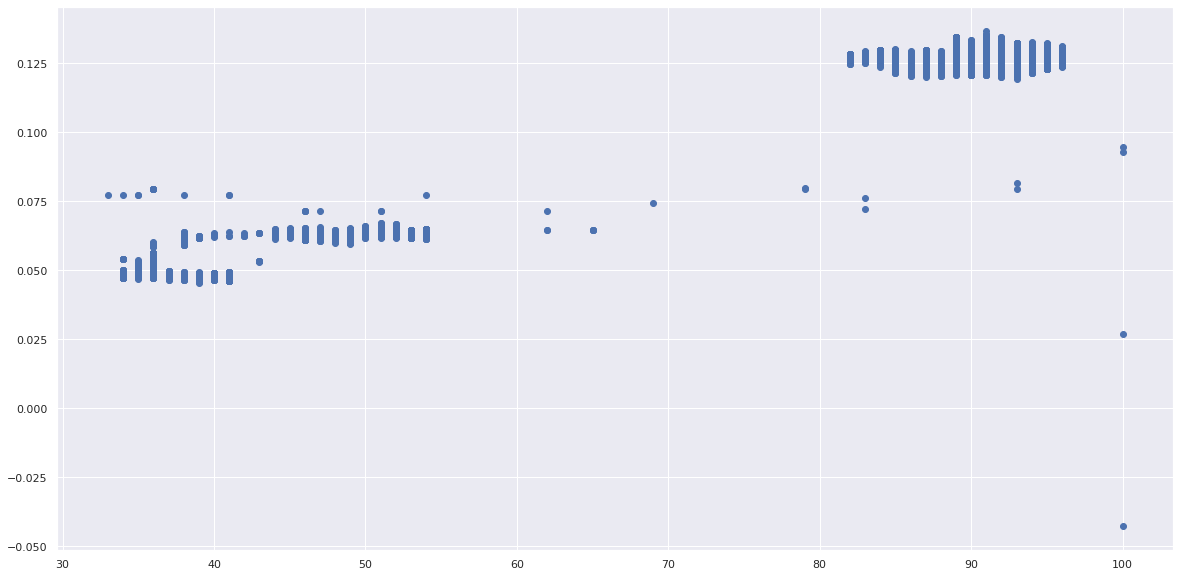

In [8]:
plt.scatter(x=df2["IGV Pos [%] (%)"], y=df2["Phi"], label="set 2")

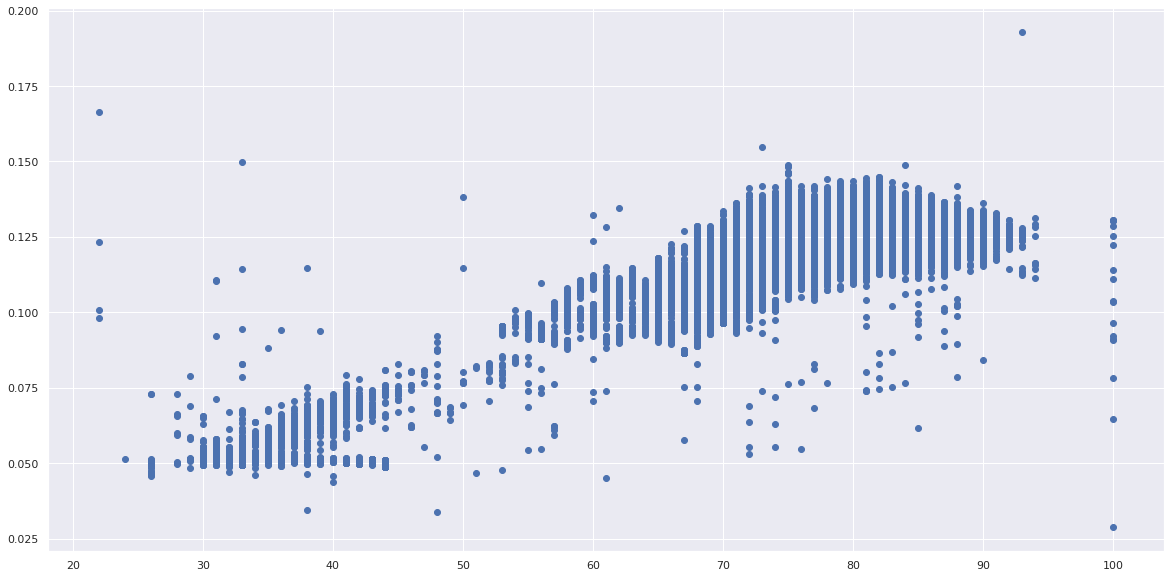

In [9]:
plt.scatter(x=df3["IGV Pos [%] (%)"], y=df3["Phi"], label="set 3")

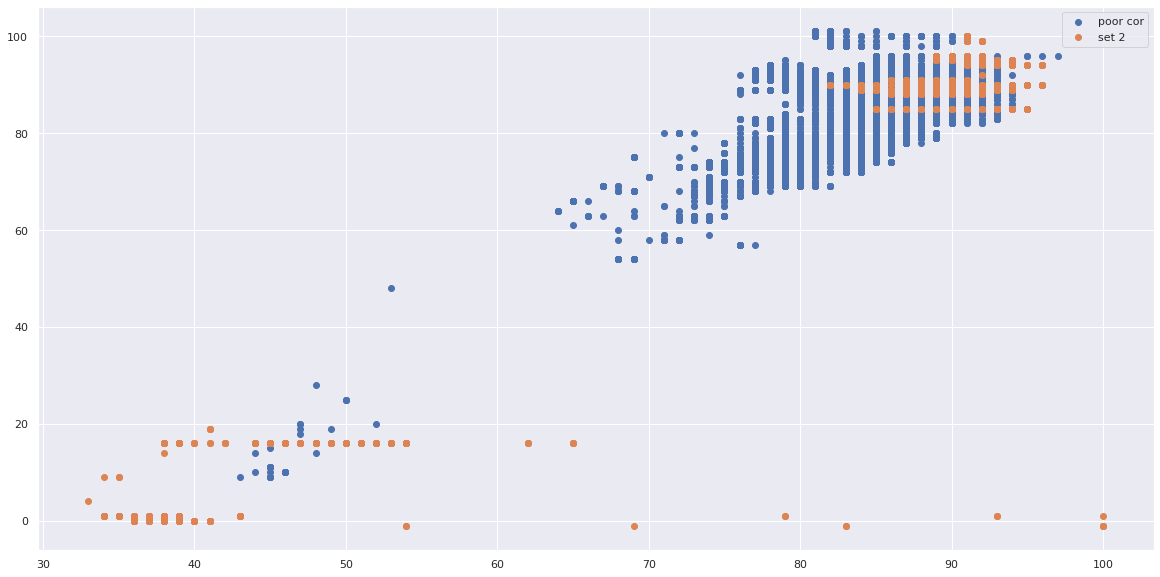

In [10]:
plt.scatter(x=df["IGV Pos [%] (%)"], y=df["VDV Pos [%] (%)"], label="poor cor")
plt.scatter(x=df2["IGV Pos [%] (%)"], y=df2["VDV Pos [%] (%)"], label="set 2")
# plt.scatter(x=df3["IGV Pos [%] (%)"], y=df3["VDV Pos [%] (%)"], label="set 3")
plt.legend()

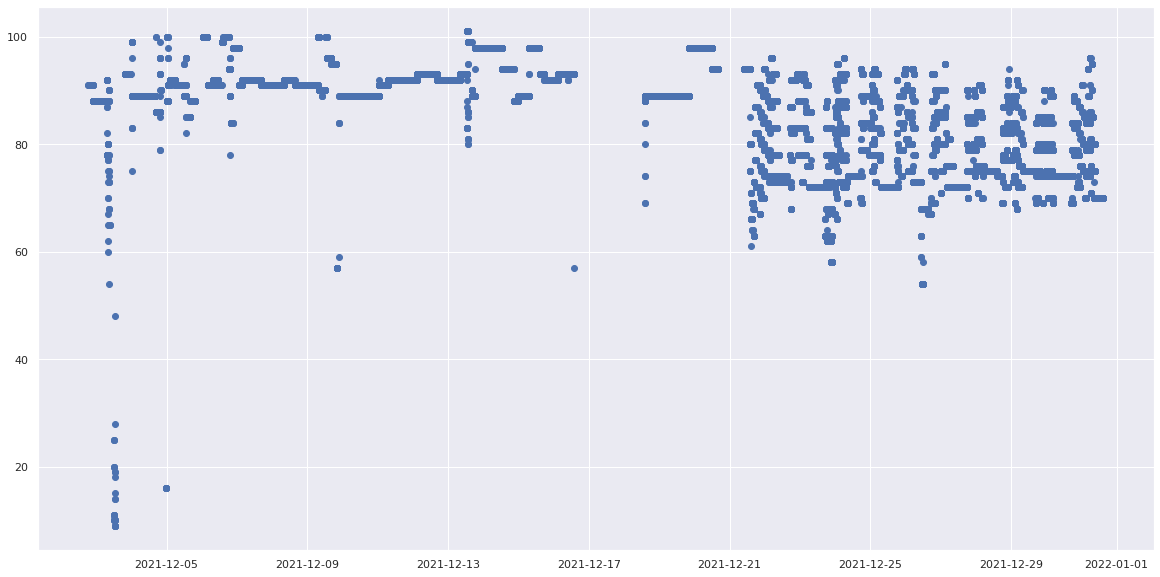

In [11]:
plt.scatter(x=df.index, y=df["VDV Pos [%] (%)"], label="poor cor")

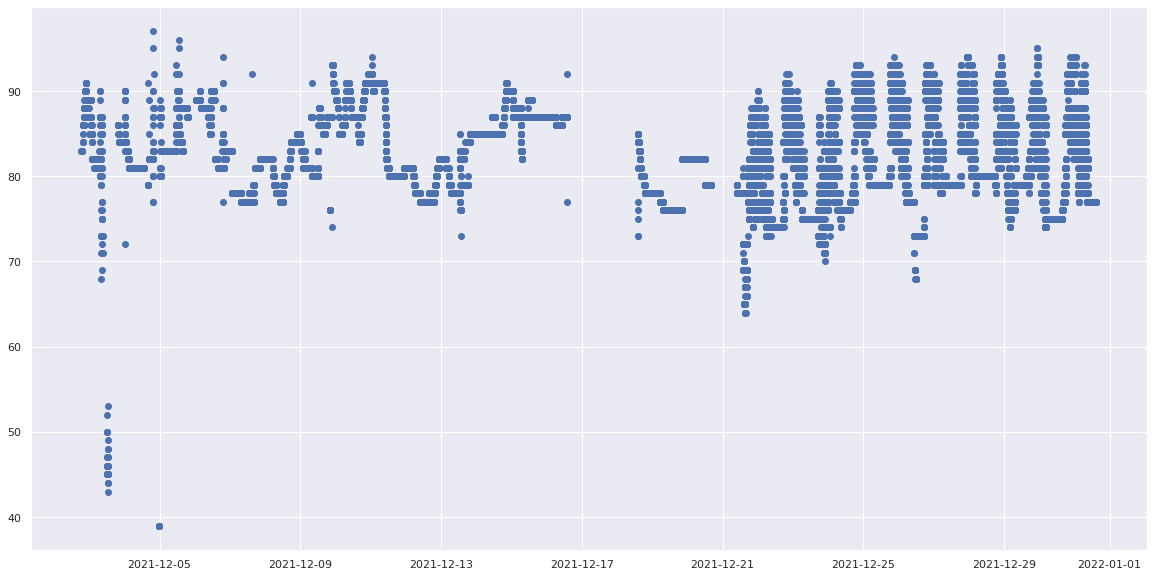

In [12]:
plt.scatter(x=df.index, y=df["IGV Pos [%] (%)"], label="poor cor")

## Find average time till change IGV




In [27]:

df = df.sort_index()
df = df.reset_index()
change = df['IGV Pos [%] (%)'].diff()
step_length = df['timestamp'].diff()
since_change = []
current_delta = 0
for is_change, delta in zip(change, step_length):
    current_delta = 0 if (is_change != 0) else \
        current_delta + delta.total_seconds() 
    since_change.append(current_delta)
df['Time Since Combination Change'] = pd.Series(since_change).values

In [28]:
df["Time Since Combination Change"].describe()

count    40192.000000
mean      8441.860859
std      11703.224394
min          0.000000
25%        391.127000
50%       2917.718500
75%      12208.607750
max      79184.225000
Name: Time Since Combination Change, dtype: float64

In [29]:

df2 = df2.sort_index()
df2 = df2.reset_index()
change = df2['IGV Pos [%] (%)'].diff()
step_length = df2['timestamp'].diff()
since_change = []
current_delta = 0
for is_change, delta in zip(change, step_length):
    current_delta = 0 if (is_change != 0) else \
        current_delta + delta.total_seconds() 
    since_change.append(current_delta)
df2['Time Since Combination Change'] = pd.Series(since_change).values

In [30]:
df2["Time Since Combination Change"].describe()

count    160081.000000
mean       5792.460787
std        6956.658841
min           0.000000
25%        1150.487000
50%        3157.115000
75%        8062.987000
max       46864.585000
Name: Time Since Combination Change, dtype: float64

In [31]:

df3 = df3.sort_index()
df3 = df3.reset_index()
change = df3['IGV Pos [%] (%)'].diff()
step_length = df3['timestamp'].diff()
since_change = []
current_delta = 0
for is_change, delta in zip(change, step_length):
    current_delta = 0 if (is_change != 0) else \
        current_delta + delta.total_seconds() 
    since_change.append(current_delta)
df3['Time Since Combination Change'] = pd.Series(since_change).values

In [32]:
df3["Time Since Combination Change"].describe()

count    94158.000000
mean      6160.355767
std       9184.702778
min          0.000000
25%        301.254000
50%       2284.899500
75%       8226.031750
max      57396.548000
Name: Time Since Combination Change, dtype: float64

In [19]:
df["IGV Pos [%] (%)"].value_counts()

78.0    4007
87.0    3707
82.0    3244
80.0    3214
79.0    3003
85.0    2937
81.0    2868
77.0    2184
76.0    2008
83.0    1843
86.0    1756
88.0    1565
84.0    1487
90.0    1448
89.0    1217
75.0    1205
91.0    1132
74.0     447
73.0     258
92.0     222
93.0     116
72.0      73
94.0      66
69.0      52
68.0      23
65.0      21
67.0      16
71.0      14
45.0      11
39.0       6
46.0       6
70.0       6
66.0       5
47.0       4
64.0       4
95.0       4
50.0       3
44.0       2
48.0       2
49.0       1
52.0       1
97.0       1
53.0       1
43.0       1
96.0       1
Name: IGV Pos [%] (%), dtype: int64

In [20]:
df2["IGV Pos [%] (%)"].value_counts()

91.0     16390
89.0     14626
92.0     14587
90.0     12646
87.0     11327
94.0     10512
85.0      9769
86.0      8693
88.0      8447
93.0      7149
84.0      6853
35.0      6744
39.0      3464
38.0      3003
34.0      2742
95.0      2616
41.0      2356
37.0      2208
36.0      1803
44.0      1780
49.0      1522
50.0      1460
54.0      1416
96.0      1365
51.0      1273
52.0       810
53.0       745
40.0       737
46.0       691
45.0       658
82.0       632
83.0       430
47.0       413
48.0       184
43.0        11
100.0        4
42.0         4
65.0         4
62.0         3
79.0         2
33.0         1
69.0         1
Name: IGV Pos [%] (%), dtype: int64

In [21]:
df3["IGV Pos [%] (%)"].value_counts()

78.0    6306
80.0    5553
79.0    4934
82.0    4905
83.0    4316
        ... 
47.0       7
49.0       6
22.0       4
51.0       3
24.0       1
Name: IGV Pos [%] (%), Length: 71, dtype: int64

In [22]:
df.count()

timestamp                        40192
MDM current (A)                  40192
Actual Volume Flow (Nm3/sec)     40192
VDV Pos [%] (%)                  40192
IGV Pos [%] (%)                  40192
Isentropic His (J/kg)            40192
Phi                              40192
Time Since Combination Change    40192
dtype: int64

In [23]:
# df = df.loc[df["Time Since Combination Change"]>30]
# df.count()

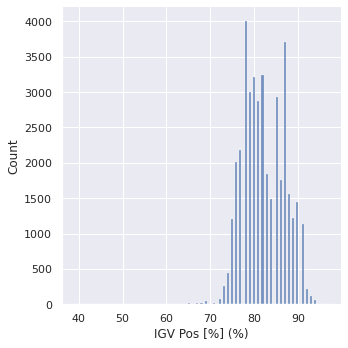

In [24]:
sns.displot(df["IGV Pos [%] (%)"])

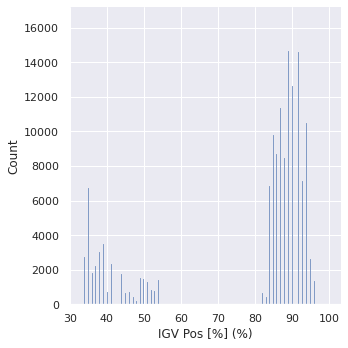

In [25]:
sns.displot(df2["IGV Pos [%] (%)"])

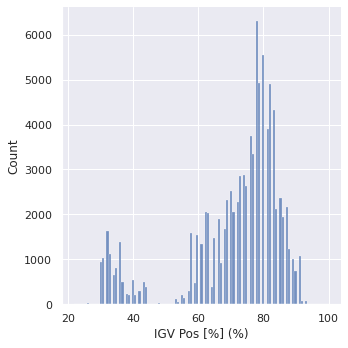

In [26]:
sns.displot(df3["IGV Pos [%] (%)"])